In [1]:
import numpy as np
import pandas as pd

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# for data
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Logistric Regression
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# For PCA
from sklearn.decomposition import PCA

# For other models
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Performance metrics
from sklearn.metrics import accuracy_score

# Hyperparameter Turing
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

0. [Introduction](#intro)
1. [Data Loading](#data_lading)
    * [Basic Inspection](#basic_inspection)
    * [Find if there is any missing data](#miss_data)
    * [Visualization Parameters](#viz_params)
    * [Correlation plot](#corr_plot)
    * [Pair plot](#pair_plt)
    * [Heat Map ](#heat_map)
2. [Initial Model with Logistic Regression](#lr_first)
    * [Parameters setup](#l_params)
3. [Principal Component Analysis (PCA)](#pca)
    * [Performing Standard Scaling](#pca_scaling)
    * [PCA Util Function](#util)
    * [Performing PCA with all features](#pac)
    * [PCA with 85% explained variance](#pca_85)
4. [Trying Different Models](#diff)
5. [Hyperparameter Finding with Grid Search](#gs)
6. [Conclusion](#final)
7. [References](#refs)

# Intorduction<a name='intro'></a>

This is created a final project for Unsupervised Machine Learning course (DTSA 5510 Master Degree Course by University of Colorado Boulder)

The concept here is to use PCA unsupervised learning algorith on Breast Cancer Data from sklearn.  I tried to apply the methods learned during the couse for this data set as an example summary.

[GIT Repo URL](https://github.com/vinothmdev/Unsupervised-Machine-Learning.git)

https://github.com/vinothmdev/Unsupervised-Machine-Learning.git

# 1. Data Loading<a name='data_lading'></a>

In [2]:
breast_cancer = load_breast_cancer()

Conver the data into data frame for EDA

In [3]:
breast_cancer_df = pd.DataFrame(breast_cancer.data, 
                  columns = breast_cancer.feature_names)
X = breast_cancer_df[:]
breast_cancer_df['diagnosis'] = breast_cancer.target
y = breast_cancer.target

## Basic Inspection<a name='basic_inspection'></a>

In [4]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
breast_cancer_df.shape

(569, 31)

In [6]:
breast_cancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
breast_cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [8]:
breast_cancer_df['diagnosis'].unique()

array([0, 1])

## Find if there is any missing data<a name='miss_data'></a>

In [9]:
breast_cancer_df.isnull().sum().sum()

0

## Visualization Parameters<a name='viz_params'></a>

In [10]:
# Figure Dimentions
fig_dims = (11.7, 8.27)
plt.rcParams['font.size']= 10

## Correlation plot<a name='corr_plot'></a>

In [11]:
breast_cancer_corr = breast_cancer_df.corr()['diagnosis'].abs().sort_values(ascending=False)
high_corr_cols = breast_cancer_corr[breast_cancer_corr > 0.6].index.to_list()[1:]
high_corr_cols

['worst concave points',
 'worst perimeter',
 'mean concave points',
 'worst radius',
 'mean perimeter',
 'worst area',
 'mean radius',
 'mean area',
 'mean concavity',
 'worst concavity']

In [12]:
high_corr_df = breast_cancer_df[breast_cancer_df.columns.intersection(high_corr_cols)]
high_corr_df = high_corr_df[:]

In [13]:
high_corr_df['diagnosis'] = breast_cancer.target

## Pair plot<a name='pair_plt'></a>

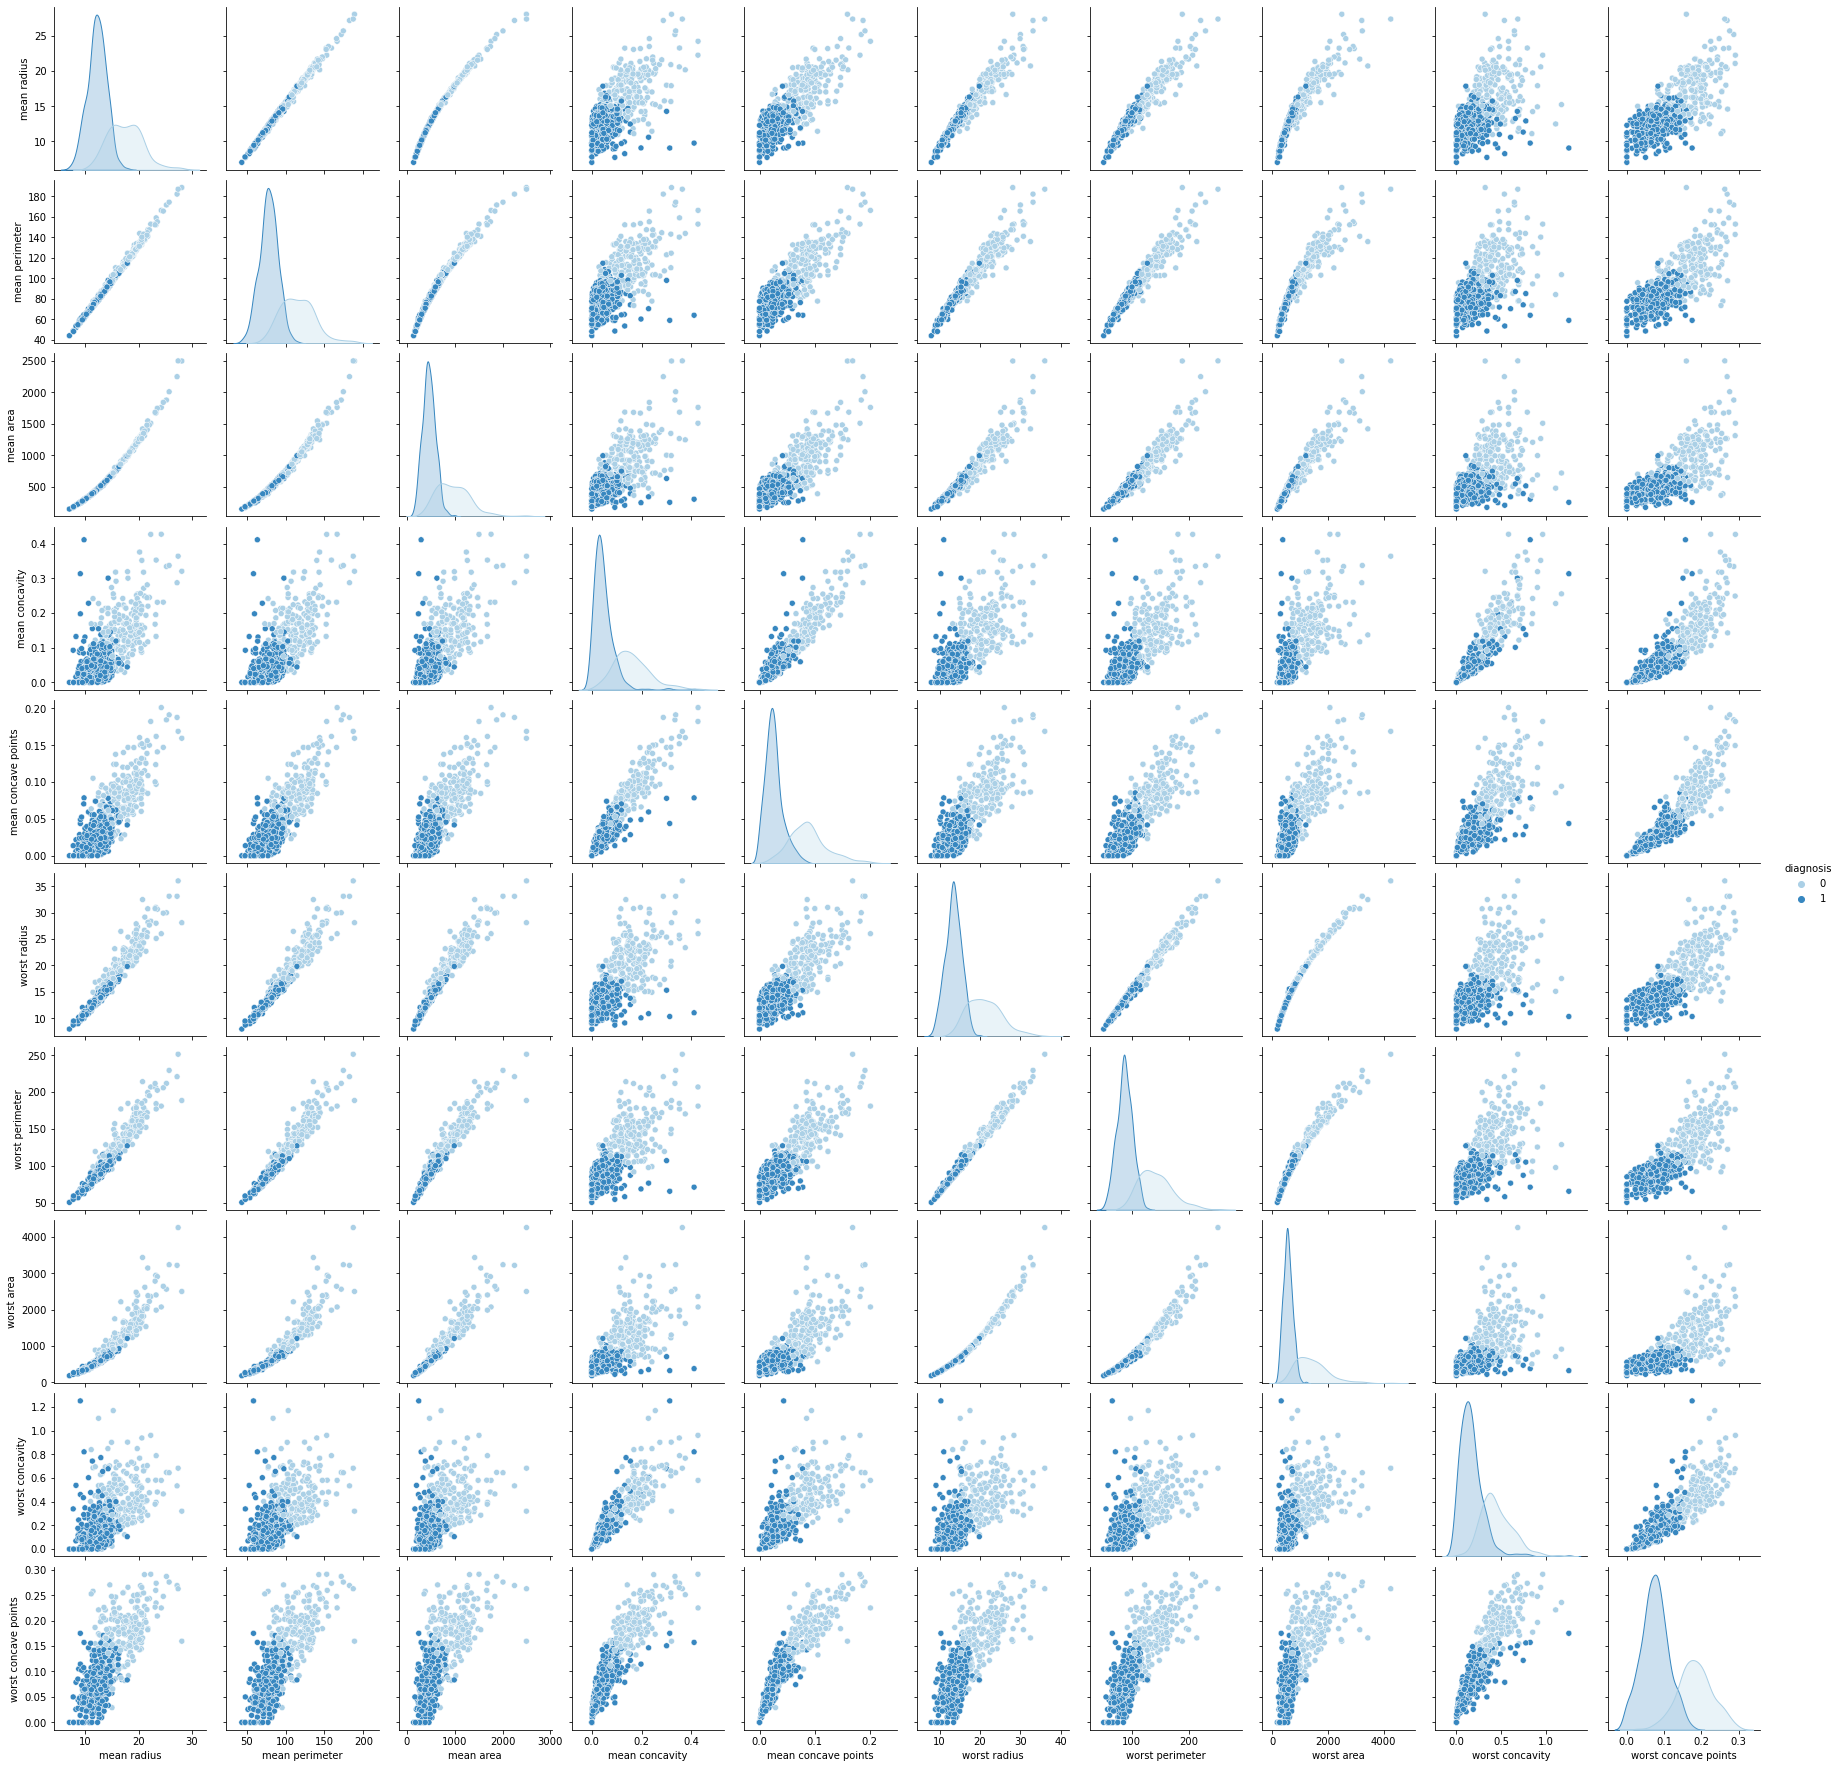

In [14]:
sns.pairplot(high_corr_df,hue='diagnosis', palette='Blues')
plt.show()

## Heat Map <a name='heat_map'></a>

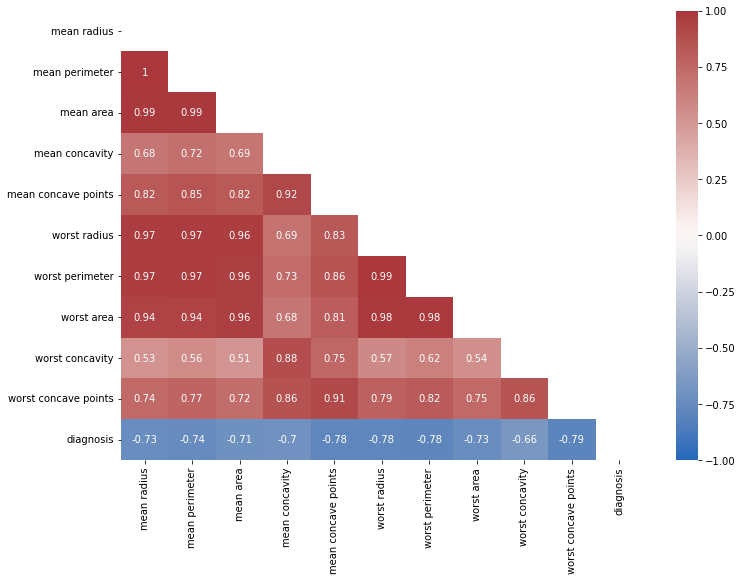

In [15]:
high_corr_ = high_corr_df.corr() 
fig, ax = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(high_corr_,dtype=bool))
sns.heatmap(high_corr_,annot=True,vmax=1,vmin=-1,center=0,cmap='vlag',mask=mask)
plt.show()

# 2. Initial Model with Logistic Regression<a name='lr_first'></a>

## Parameters setup<a name='l_params'></a>

In [16]:
# Parameters
random_state = 42
test_size = 0.2
shuffle = True

In [17]:
%%time
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size = test_size,
                     shuffle = shuffle,
                     random_state=random_state)

log_reg_model_ = LogisticRegression(max_iter = 5000)
log_reg_model_.fit(X_train, y_train)

Wall time: 712 ms


LogisticRegression(max_iter=5000)

In [18]:
log_reg_model_.score(X_train,y_train)

0.9604395604395605

In [19]:
log_reg_model_.score(X_test,y_test)

0.956140350877193

# 3. Principal Component Analysis (PCA)<a name='pca'></a>

## Performing Standard Scaling<a name='pca_scaling'><a>

In [20]:
# Standard Scaling
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## PCA Util Function<a name='util'></a>

In [21]:
def print_pca(components):
    # PCA
    pca_ = PCA(n_components = components)
    pca_.fit(X_scaled)

    # Plot cumulative sum of the resulted
    # PCA components
    label = 'Number of components {}'.format(len(pca_.explained_variance_ratio_))
    plt.plot(pca_.explained_variance_ratio_.cumsum() * 100, label=label)
    plt.xlabel("Number of components")
    plt.ylabel("Explained variance (%)")
    plt.legend(fontsize=14)
    plt.show()
    
    return pca_

## Performing PCA with all features<a name='pac'></a>

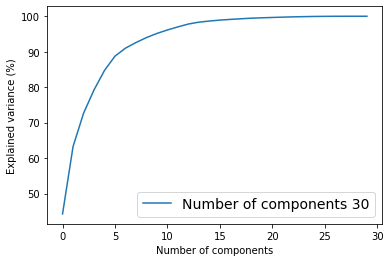

PCA()

In [22]:
print_pca(None)

## PCA with 85% explained variance<a name='pca_85'></a>

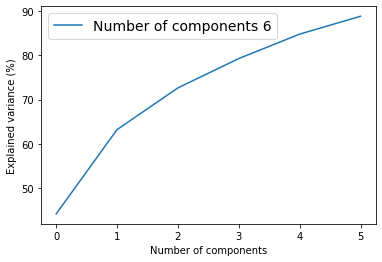

In [23]:
pca_ = print_pca(0.85)

In [24]:
X_pca = pca_.transform(X_scaled)
print(X_pca.shape)

(569, 6)


In [25]:
%%time
lr = LogisticRegression()
log_reg_model_ = Pipeline([
    ('std_scaler', sc),
    ('pca', pca_),
    ('regressor', lr)
])
log_reg_model_.fit(X_train,y_train)

Wall time: 8 ms


Pipeline(steps=[('std_scaler', StandardScaler()),
                ('pca', PCA(n_components=0.85)),
                ('regressor', LogisticRegression())])

In [26]:
log_reg_model_.score(X_train,y_train)

0.9758241758241758

In [27]:
log_reg_model_.score(X_test,y_test)

0.9824561403508771

# 4. Trying Different Models<a name='diff'></a>

In [28]:
def model_fit(model):
    model.fit (X_train, y_train)
    y_hat_ = model.predict (X_test)
    return accuracy_score(y_test, y_hat_)

In [29]:
lreg = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
svm = SVC(kernel = 'rbf', random_state = 0)
dtc = DecisionTreeClassifier (criterion = 'entropy', random_state = 0)
rfc = RandomForestClassifier (n_estimators = 100, criterion = 'entropy', random_state = 1)
model_all_ = [lreg, knn, nb, svm, dtc, rfc]

In [30]:
%%time

acc_all_ = [model_fit(model) for model in model_all_]

Wall time: 236 ms


In [31]:
models_ = ["LOGISTIC REGRESSION", "K-NN", "NAIVE BAYES", "SVM", "DECISION TREE", "RANDOM FOREST"]
acc_df = pd.DataFrame ({'model': models_, 'acc': acc_all_})
acc_df.set_index('model', inplace=True)
acc_df.sort_values(by='acc', ascending=False)

,acc
model,
NAIVE BAYES,0.973684
RANDOM FOREST,0.964912
LOGISTIC REGRESSION,0.956140
K-NN,0.956140
DECISION TREE,0.956140
SVM,0.947368


# 5. Hyperparameter Finding with Grid Search<a name='gs'></a>

In [32]:
def find_hyper_param(model, param):
    grid_search = GridSearchCV(estimator = model,
                           param_grid = param,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
    grid_search.fit(X_train, y_train)
    return grid_search

In [33]:
lreg_params = [{'penalty': ['l1', 'l2'],
                'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}]
knn_params = [{'n_neighbors': [3,5,7,10,13,15],
                'weights': ['uniform', 'distance'],
                'p': [1,2]}]
nb_params = None
svm_params = [{'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                'kernel': ['linear', 'rbf'],
                'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
dtc_params = [{'criterion':['gini','entropy'],
                'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150], 
                'max_leaf_nodes': [2,4,6,10,15,30,40,50,100],
                'min_samples_split': [2, 3, 4]}]
rfc_params = [{'n_estimators': [100,200,300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': [10,25,50,'none'],
               'min_samples_leaf': [1, 2], 
               'min_samples_split': [2, 5]}]
params_all_ = [lreg_params, knn_params, nb_params, svm_params, dtc_params, rfc_params]

In [34]:
%%time
tuned_gs_all_ = [find_hyper_param(model_all_[i], params_all_[i]) for i in range(6) if params_all_[i] != None]

Wall time: 5min 46s


In [40]:
tuned_acc_all_ = [tuned_gs_all_[i].best_score_ for i in range(5)]
tuned_acc_all_.insert(2, 0)

In [41]:
acc_df['tuned_acc'] = tuned_acc_all_
acc_df.sort_values(by='tuned_acc', ascending=False)

,acc,tuned_acc
model,,
RANDOM FOREST,0.964912,0.971401
LOGISTIC REGRESSION,0.956140,0.967053
SVM,0.947368,0.964783
DECISION TREE,0.956140,0.945169
K-NN,0.956140,0.938406
NAIVE BAYES,0.973684,0.000000


In [42]:
acc_df.sort_values(by='acc', ascending=False)

,acc,tuned_acc
model,,
NAIVE BAYES,0.973684,0.000000
RANDOM FOREST,0.964912,0.971401
LOGISTIC REGRESSION,0.956140,0.967053
K-NN,0.956140,0.938406
DECISION TREE,0.956140,0.945169
SVM,0.947368,0.964783


# Conclusion<a name='final'></a>
With help of this project I summarized the process for realtime  project in Data Science.  Tryed to apply various techniques learned during the course and studied their impact.

Thank you!!

# References<a name='refs'></a>

1. [PCA sklearn library](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
2. [Breast Cancer Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)